In [1]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

from modules.trainutils import build_dl, piece_class_parse
from modules.trainutils import my_metrics, stratify_sample
from modules.trainutils import show_cf

In [16]:
from modules.tfmsutils import MyResizeDeterm

In [17]:
test_path = Path('../../../other-chess-data/regulation-pieces-1/crops/')
train_path = Path('../../../rf-chess-data/cropped_v1/')

In [18]:
test_dl = build_dl(test_path, n=None)

In [19]:
len(test_dl.train.items)

60

In [20]:
n = 200
seed=42

train_dl = ImageDataLoaders.from_name_func(
                train_path, 
                # get_image_files(train_path),
                stratify_sample(train_path, n=n, np_seed=seed),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
                item_tfms=MyResizeDeterm(128, method='crop'),
                batch_tfms=aug_transforms(),
)

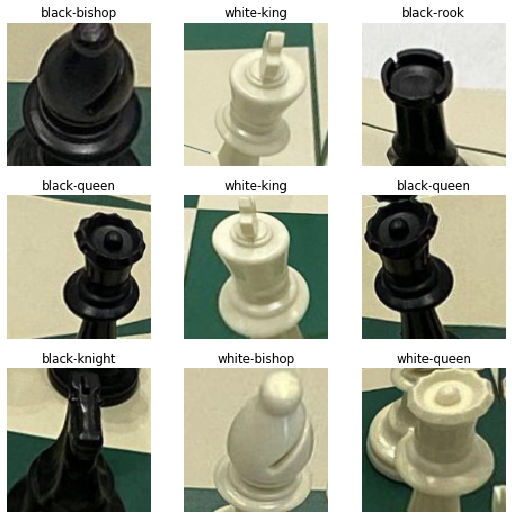

In [21]:
train_dl.show_batch()

In [22]:
learn = cnn_learner(train_dl, resnet18, metrics=error_rate)

In [23]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,3.849233,3.834176,0.921053,00:09
1,3.408351,2.852537,0.789474,00:08


In [24]:
test_dl = learn.dls.test_dl(get_image_files(test_path), 
                            with_labels=True)

In [25]:
my_metrics(learn, test_dl)

(3.781210222436736, 0.15)

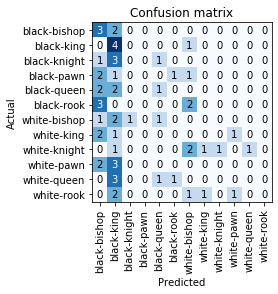

In [26]:
interp = show_cf(learn, test_dl)